## Ejercicio 1: Resolver oscilador amortiguado: $$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$. 
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.

In [2]:
#=Resolver el oscilador amortiguado con euler y runge kutta =#

#=Copiamos nuestra función para poder hacer la comparacion entre los métodos implicito y explicito=#
function metodoEuler(derivada::Function,x0,xf,y0,h)
    
    listaX = []
    listaY = []
    
    #Agreagamos los primeros elementos a las listas 
    
    push!(listaX,x0)
    push!(listaY,y0)
    
    #=Mientras no se llegue al ultimo elemento se seguiran agregando elementos a las listas. Aqui tambien se podria haber calculado el número de pasos para llegar a xf como n = (xf-x0)/h y luego implementado un for de 1 a n, pero en realidad, es lo mismo, y además si hacemos lo anterior hay que redondear a k al entero menor. i.e. debemos ocupar mas espacio para almacenar a n , y hacer mas operaciones de tiempo constante. =#
    
    while(last(listaX)<xf)
        
        push!(listaY,last(listaY) + derivada(last(listaY),last(listaX))*h)
        push!(listaX,last(listaX)+h)
    end
    
    return [listaX,listaY]
    
end

metodoEuler (generic function with 1 method)

In [10]:
function rungeKutta4(f::Function,t0,tf,x0,delta)
    tArray = []
    xArray = []
    
    #=Como siempre agregamos los primeros puntos a los arreglos=#

    push!(tArray,t0)
    push!(xArray,x0)
    
    #=Definimos las funciones de Runge Kutta=#
    
    f1(x,t) = f(x,t)
    f2(x,t) = f(x+(delta/2)*f1(x,t),t+(delta/2))
    f3(x,t) = f(x+(delta/2)*f2(x,t),t+(delta/2))
    f4(x,t) = f(x+(delta)*f3(x,t),t+delta)
    
    rungeFunction(x,t) = x+(delta/6)*(f1(x,t)+2*f2(x,t) +2*f3(x,t)+f4(x,t))
    
    while(last(tArray)<tf)
        push!(xArray,rungeFunction(last(xArray),last(tArray)))
        push!(tArray,last(tArray)+delta)
        
    end
    
    return [tArray,xArray]
    
end

rungeKutta4 (generic function with 1 method)

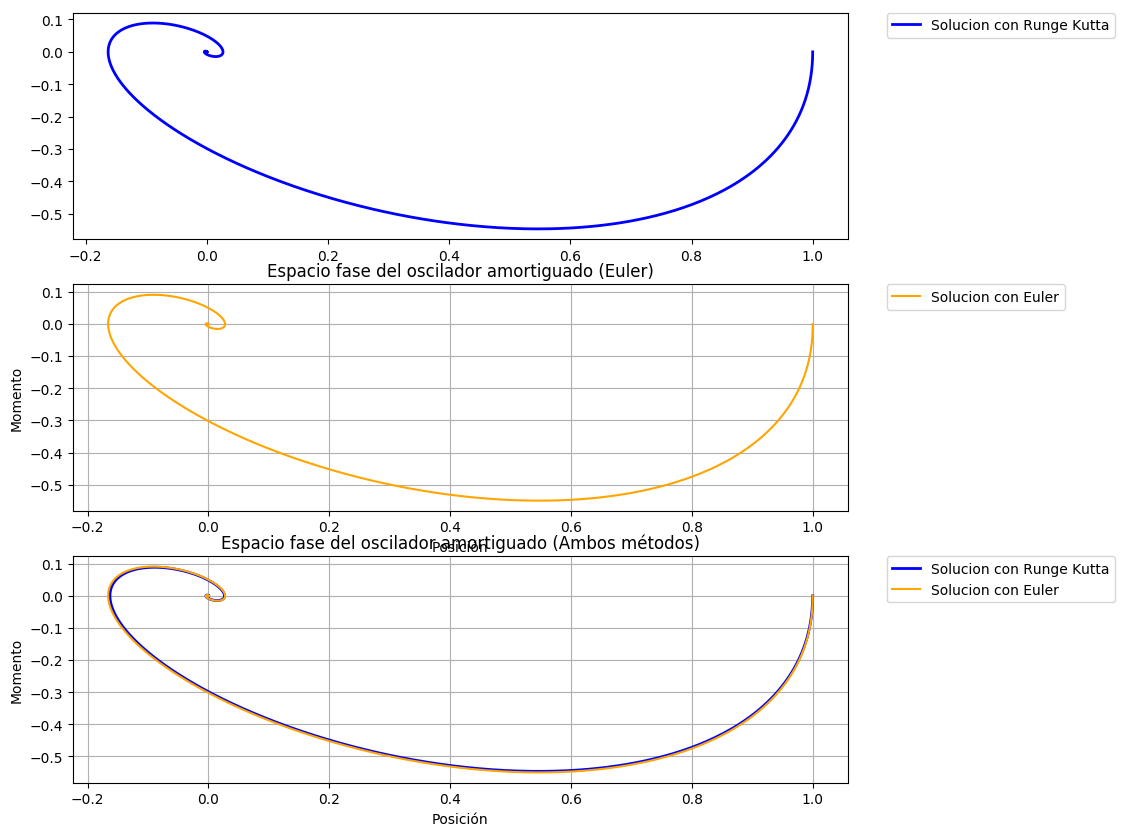

In [8]:
k = 1
b  = 1
f(x,t) = [x[2],-k*x[1]-b*x[2]]
condicionesIniciales = [1,0]
xCord(x) = x[1]
yCord(x)=x[2]


solucionRunge = rungeKutta4(f,0,20,condicionesIniciales,0.01)
solucionEuler = metodoEuler(f,0,20,condicionesIniciales,0.01)

using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 10))

#Grafica de Runge Kutta
plt.subplot(2,1,1)
plt.xlabel("Posición")
plt.ylabel("Momento")
plt.title("Espacio fase del oscilador amortiguado (Runge Kutta)")
plt.grid()
plt.subplot(3,1,1)
plt.plot(xCord.(solucionRunge[2]),yCord.(solucionRunge[2]),color = "blue",label = "Solucion con Runge Kutta",linewidth =2)    
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()

#Grafica de Euler
plt.subplot(3,1,2)
plt.xlabel("Posición")
plt.ylabel("Momento")
plt.title("Espacio fase del oscilador amortiguado (Euler)")
plt.grid()
plt.plot(xCord.(solucionEuler[2]),yCord.(solucionEuler[2]),color = "orange",label = "Solucion con Euler")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()

#Ambos
plt.subplot(3,1,3)
plt.xlabel("Posición")
plt.ylabel("Momento")
plt.title("Espacio fase del oscilador amortiguado (Ambos métodos)")
plt.grid()
plt.plot(xCord.(solucionRunge[2]),yCord.(solucionRunge[2]),color = "blue",label = "Solucion con Runge Kutta",linewidth =2)    
plt.plot(xCord.(solucionEuler[2]),yCord.(solucionEuler[2]),color = "orange",label = "Solucion con Euler")
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
plt.show()

## 2.-Resolver el péndulo simple: $$l \ddot\theta=-g \sin(\theta),$$ usando Runge-Kutta orden 4.
Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.
Ejemplo útil para graficar muchas condiciones iniciales (en el siguiente caso un vector de dos dimensiones), números aleatorios entre el $-6$ y $6$:

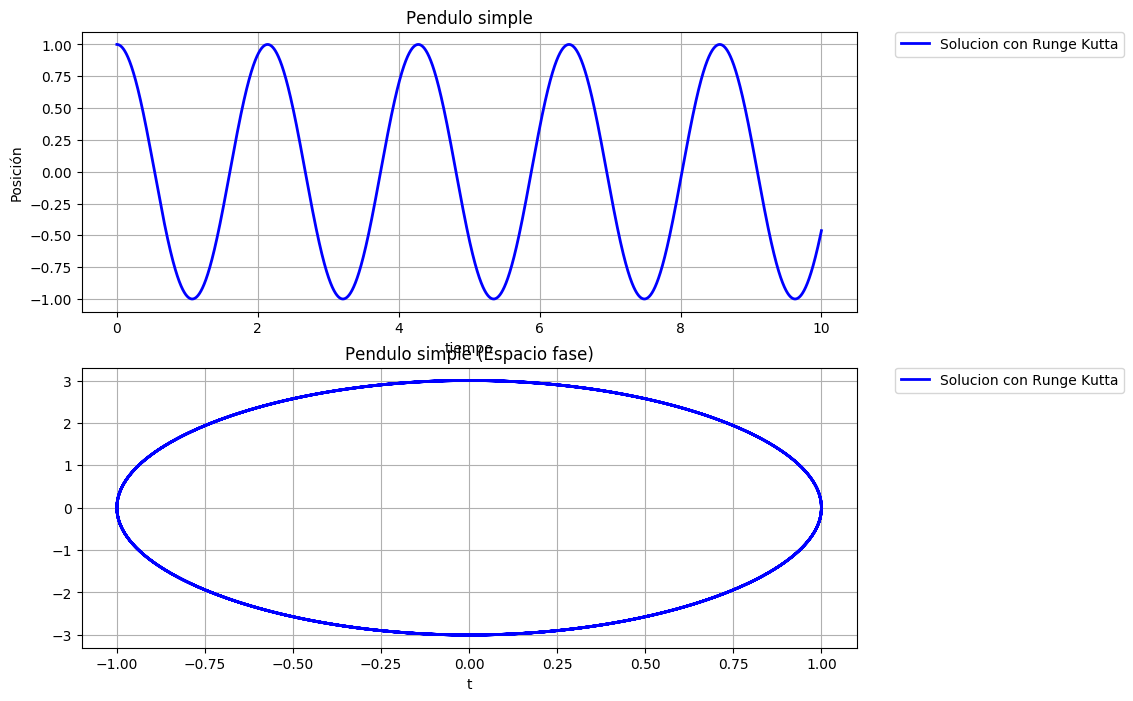

In [10]:
#=Resolver el pendulo simple=#

l = 1
g = 9.81

pendulo(x,t)= [x[2],-(g/l)*sin(x[1])]
condicionesIniciales = [1,0]
solucionRunge = rungeKutta4(pendulo,0,10,condicionesIniciales,0.0001)

using PyPlot
plt = PyPlot
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.xlabel("tiempo")
plt.ylabel("Posición")
plt.title("Pendulo simple")
plt.grid()
plt.plot(solucionRunge[1],xCord.(solucionRunge[2]),color = "blue",label = "Solucion con Runge Kutta",linewidth =2)    
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)

plt.subplot(2,1,2)
plt.xlabel("t")
plt.title("Pendulo simple (Espacio fase)")
plt.grid()
plt.plot(xCord.(solucionRunge[2]),yCord.(solucionRunge[2]),color = "blue",label = "Solucion con Runge Kutta",linewidth =2)    
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
plt.show()

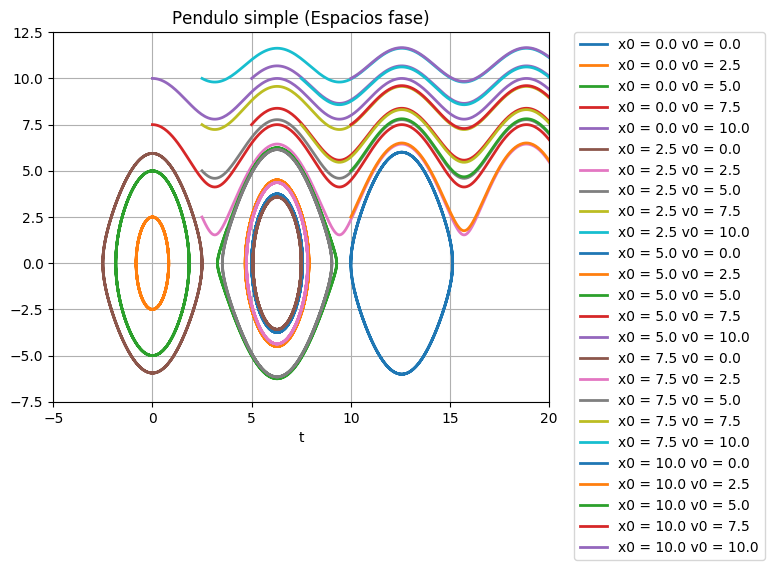

In [19]:
#=Graficar muchas condiciones iniciales=#
      plt = PyPlot

pendulo(x,t)= [x[2],-(g/l)*sin(x[1])]
intervalPosition = linspace(0,10,5)
intervalVelocity = linspace(0,10,5)

for i in 1:length(intervalPosition)
    for j in 1: length(intervalVelocity)
        solucionRunge = rungeKutta4(pendulo,0,10,[intervalPosition[i],intervalPosition[j]],0.01)
        plt.xlabel("t")
        plt.title("Pendulo simple (Espacios fase)")
        plt.grid()
        plt.plot(xCord.(solucionRunge[2]),yCord.(solucionRunge[2]),label = "x0 = $(intervalPosition[i]) v0 = $(intervalVelocity[j])",linewidth =2)    
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)    
    end
    ax = gca()

    # add new limits from 0 - 100
    ax[:set_xlim]([-5,20])
    ax[:set_ylim]([-7.5,12.5])
    
    
end


## Ejercicio 3: Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$
hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [5]:
#=Hacemos primero una función que nos arroje numeros aleatorios flotantes entre un número inicial y uno final =#
function randomFloat(initial::Float64, final::Float64)
    
   return initial +(final -initial)*rand() 
    
end

randomFloat (generic function with 1 method)

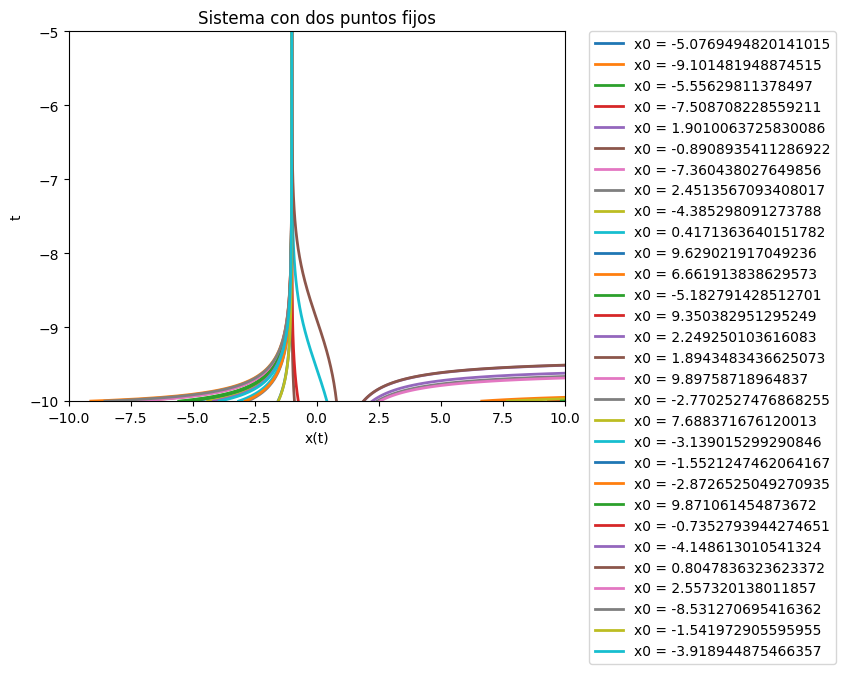

(-10, -5)

In [54]:
#=Ahora, si , vamos a probar condiciones iniciales entre -10 y 10, graficaremos unas veinte condiciones. =#

arregloCondiciones = []

initial =-10.
final = 10.

for i in 1:30
    push!(arregloCondiciones,randomFloat(initial,final))
end 

for condicion in arregloCondiciones
    solucion = rungeKutta4((x,t)->(x^2 -1),initial,final,condicion,0.01)
    
    plt.xlabel("x(t)")
    plt.ylabel("t")
    plt.title("Sistema con dos puntos fijos")
    plt.grid()
    plt.plot(solucion[2],solucion[1],label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end 
     ax = gca()

    # add new limits from 0 - 100
    ax[:set_xlim]([initial,final])
    ax[:set_ylim]([-10,-5])


En el gráfico podemos ver que el punto -1 es un atractor, ya que las lineas cuya condición inicial estan cerca de ahi convergen a este punto al paso del tiempo. En cambio en $x=1$ las lineas parecen diverger drasticamente conforme t avanza. Asi que este punto es un repulsor. 


## Ejercicio 4 También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema: $$\frac{dx}{dt}=x^2,$$
¿cual es el punto fijo único?, es un atractor o un repulsor?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

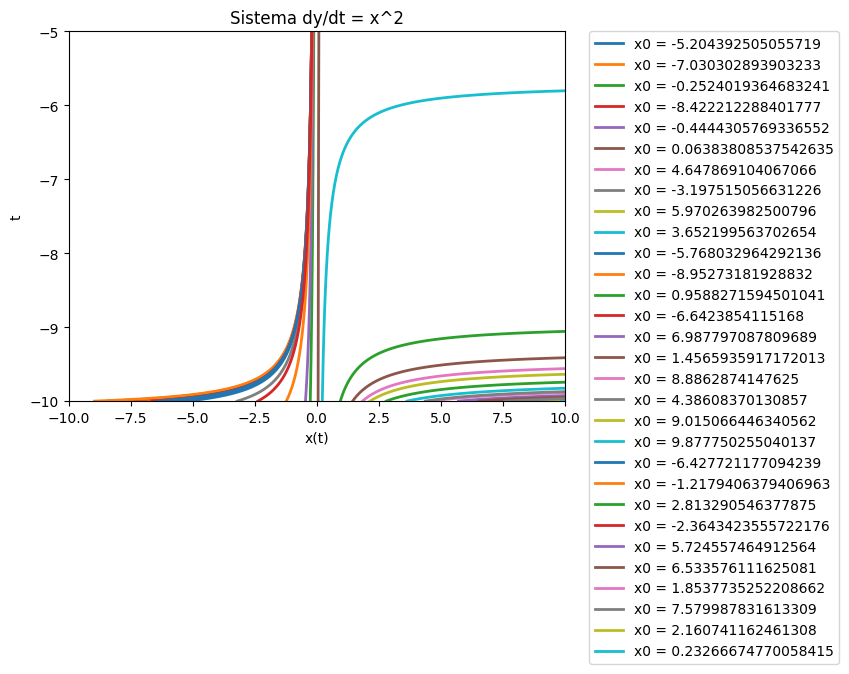

(-10, -5)

In [59]:

#=Basicamente es copiar y pegar el código utilizado en el ejercicio anterior. Solo se cambia la funcion que le damos al método de Runge Kutta.=#
arregloCondiciones = []

initial =-10.
final = 10.

for i in 1:30
    push!(arregloCondiciones,randomFloat(initial,final))
end 

for condicion in arregloCondiciones
    solucion = rungeKutta4((x,t)->x^2,initial,final,condicion,0.01)
    
    plt.xlabel("x(t)")
    plt.ylabel("t")
    plt.title("Sistema dy/dt = x^2")
    plt.grid()
    plt.plot(solucion[2],solucion[1],label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end 
     ax = gca()
    ax[:set_xlim]([initial,final])
    ax[:set_ylim]([-10,-5])


Aqui hay un punto fijo x = 0, el cual no parece ser ni atractor ni repulsor. Las condiciones iniciales que empiezan a la izquierda del cero (valor negativo) convergen a este punto con el paso del tiempo, sin embargo las positivas parecen diverger conforme transcurre t. 


## Ejercicio 5: Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones: $$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a   b \\ c   d \end{array}\right)\vec x,$$ donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$ Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
$a=b=1$, $c=d=0$

$a=b=-1$, $c=d=0$

$a=1$, $b=-2$, $c=d=0$

$a=1$, $b=-0.5$, $c=d=0$

$a=d=0$, $b=-c=1$

$a=d=1$, $b=-c=1$

$a=d=-1$, $b=-c=1$

$a=d=-1$, $b=-c=-1$

$a=b=1$, $b=4,c=-2$

$a=b=d=-1$, $c=0$

In [45]:
#=Para facilitar el asunto vamos a hacer una función=#
using PyPlot
plt = PyPlot
function ejercicio5Funcion(a,b,c,d,numeroDeCondiciones)
    #=La funcion que le daremos a Reunge Kutta=#
    
    f(x,t) = [a*x[1]+b*x[2],c*x[1]+d*x[2]]
    condicionesIniciales = []
    initial = -5.
    final = 5.
    solucion =[]
    xCord(x) = x[1]
    yCord(x) = x[2]
    
    derivada1 = []
    derivada2 = []
    
    
    #=Llenamos el arreglo de condiciones iniciales =#

    for i in 1:numeroDeCondiciones
        push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
    end
    
    for condicion in condicionesIniciales
        solucion = rungeKutta4(f,initial,final,condicion,0.01)
        #=Se obtienen las derivadas, esto es necesario para graficar los dos espacios fase.=#
        derivada1 = xCord.(f.(solucion[2],solucion[1]))
        derivada2 = yCord.(f.(solucion[2],solucion[1]))
        
        plt.subplot(2,1,1)
         plt.tight_layout()
        plt.xlabel("x(t)")
        plt.ylabel("dx/dx")
        plt.title("Espacio fase x(t) con a = $(a), b = $(b), c = $(c) y d = $(d)")
        plt.grid()
        plt.plot(xCord.(solucion[2]),derivada1,label = "x0 = $(condicion)",linewidth =2)    
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
        
        plt.subplot(2,1,2)
         plt.tight_layout()
        plt.xlabel("y(t)")
        plt.ylabel("dy/dt")
        plt.title("Espacio fase y(t) con a = $(a), b = $(b), c = $(c) y d = $(d)")
        plt.grid()
        plt.plot(yCord.(solucion[2]),derivada2,label = "x0 = $(condicion)",linewidth =2)    
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
        
    end 
    
    #ax = gca()
    #ax[:set_xlim]([initial,final])
    #ax[:set_ylim]([-10,-5])
    end 

ejercicio5Funcion (generic function with 1 method)

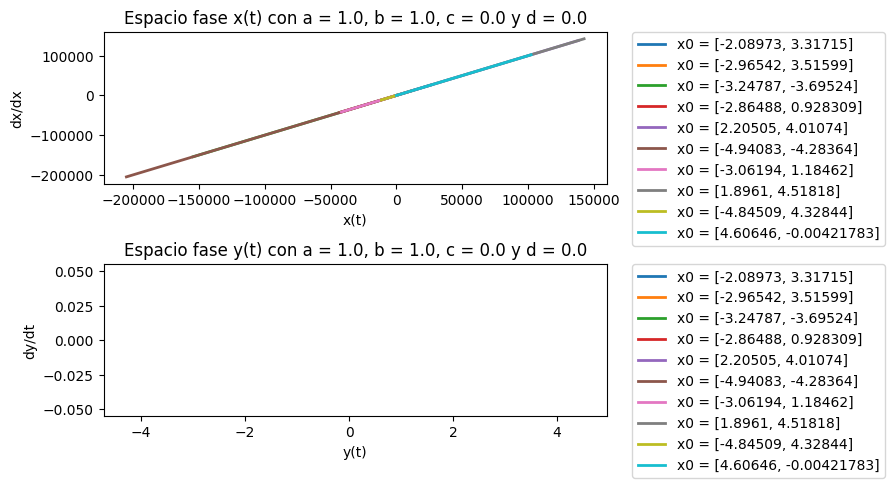

In [46]:
ejercicio5Funcion(1.,1.,0.,0.,10)

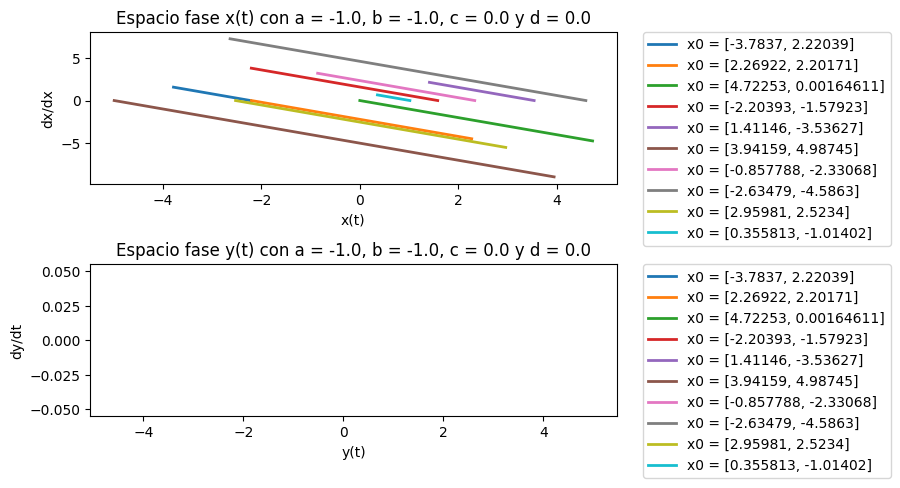

In [47]:
ejercicio5Funcion(-1.,-1.,0.,0.,10)

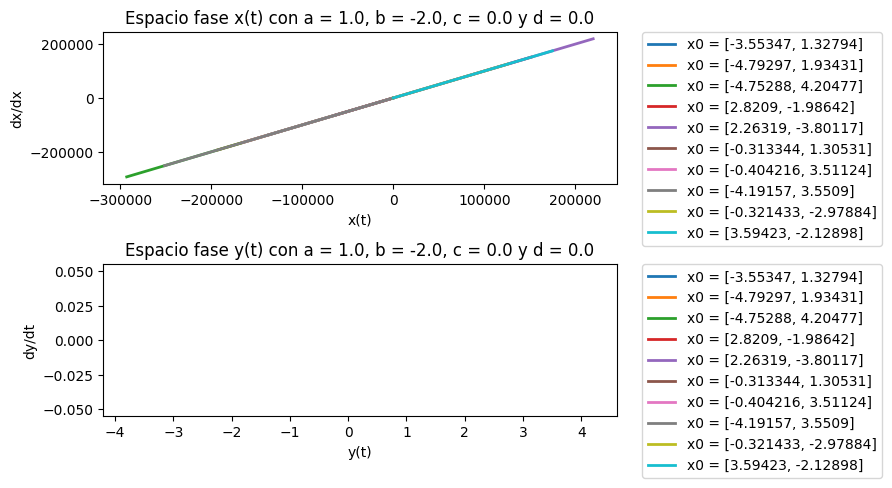

In [48]:
ejercicio5Funcion(1.,-2.,0.,0.,10)

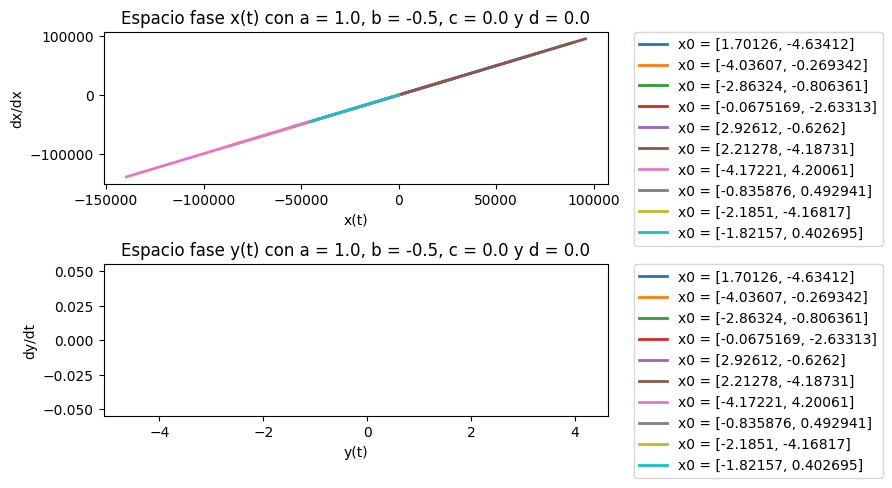

In [49]:
ejercicio5Funcion(1.,-0.5,0.,0.,10)

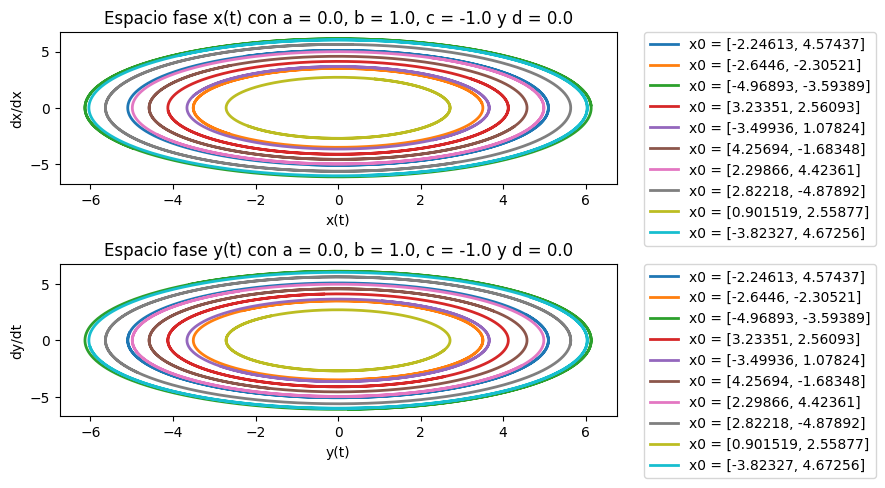

In [52]:
ejercicio5Funcion(0.,1.,-1.,0.,10)

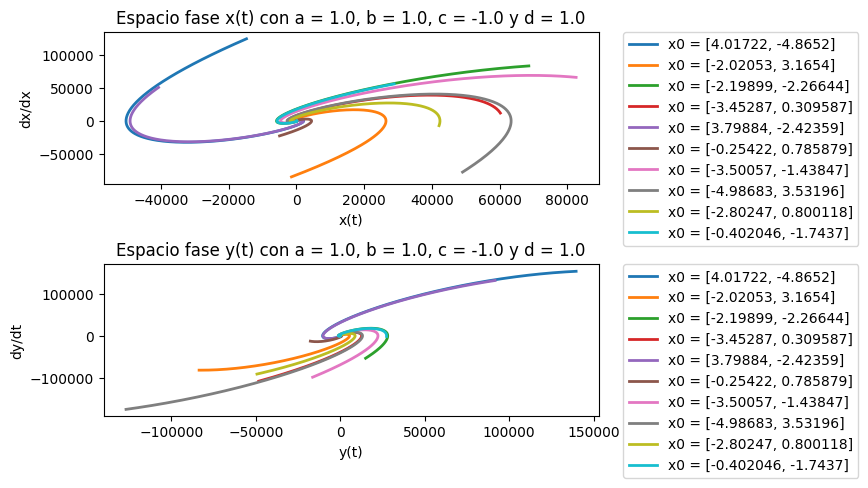

In [53]:
ejercicio5Funcion(1.,1.,-1.,1.,10)

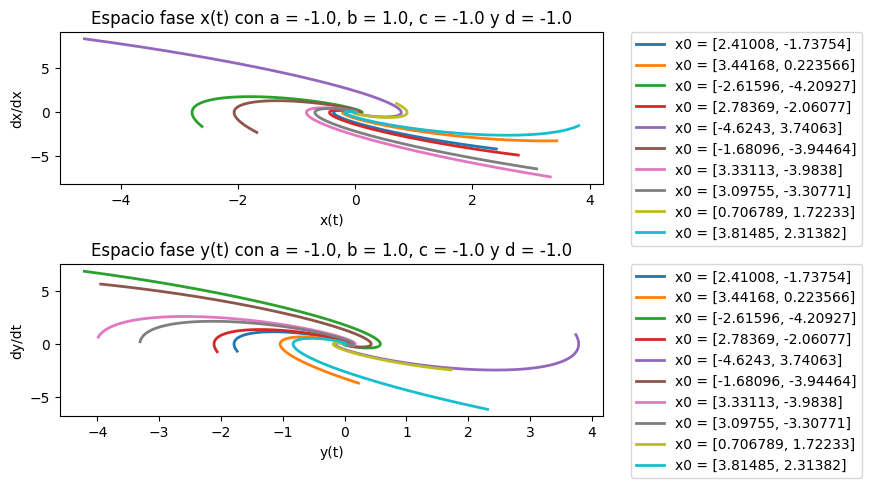

In [55]:
ejercicio5Funcion(-1.,1.,-1.,-1.,10)

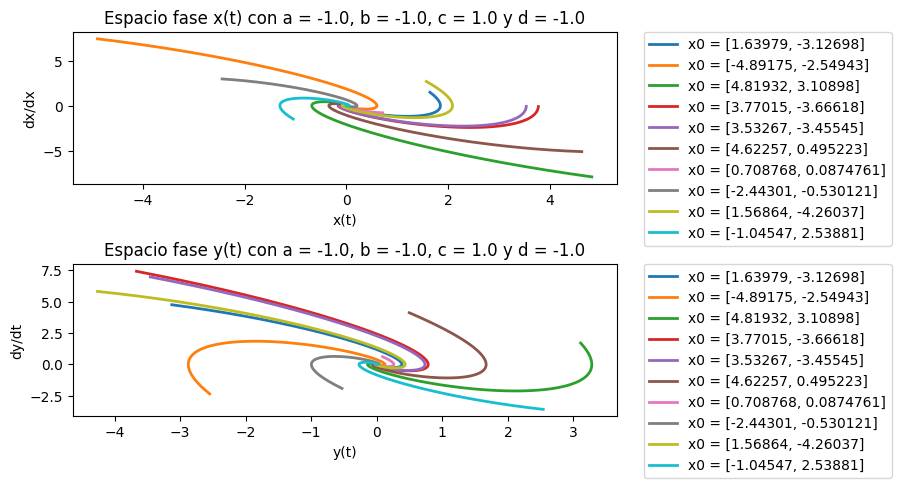

In [56]:
ejercicio5Funcion(-1.,-1.,1.,-1.,10)

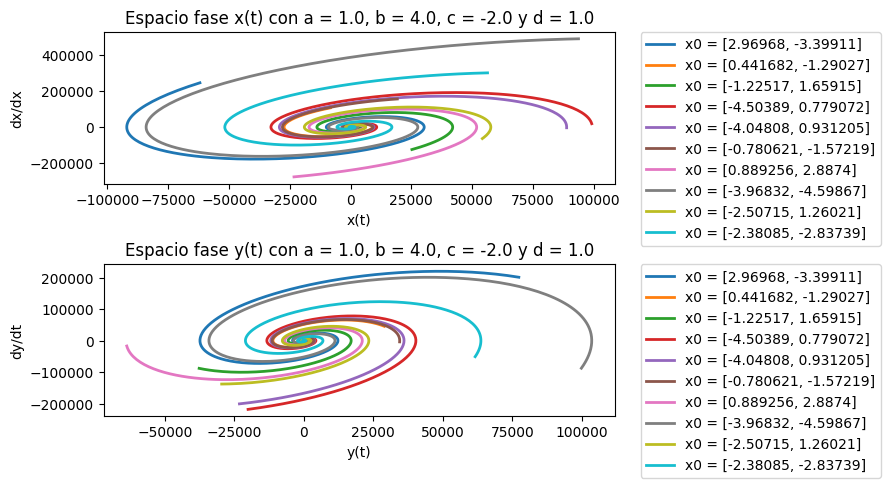

In [57]:
ejercicio5Funcion(1.,4.,-2.,1.,10)

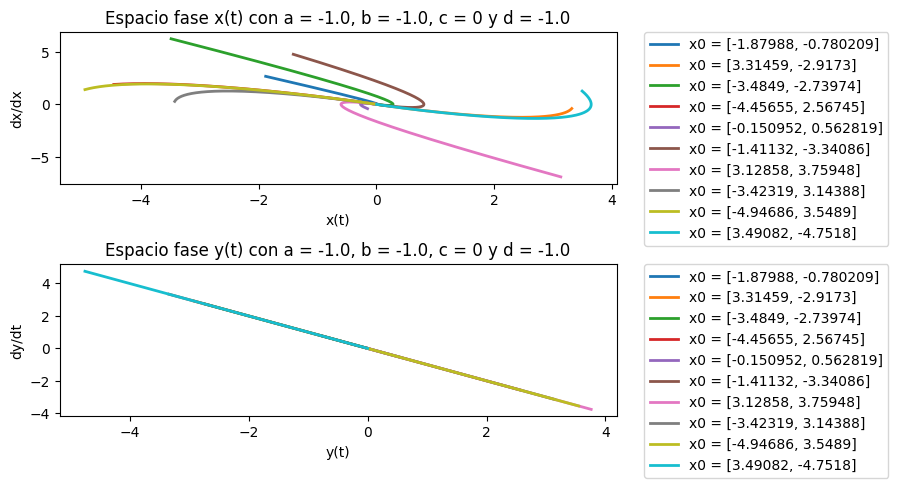

In [58]:
ejercicio5Funcion(-1.,-1.,0,-1.,10)